Aufgabe 45.

Im Datensatz Stability finden Sie Daten zu chemischen Experimenten, die das Ziel haben die Stabilität eines Moleküls zu maximieren

In [167]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f

In [130]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [131]:
df = pd.read_csv('../data/Stability.txt')
df.head()

,acid concentration,catalyst concentration,temperature,monomer concentration,Seed,stability
0,30,2,150,37.5,Yes,21.25
1,20,2,200,37.5,No,25.11
2,20,3,150,25.0,Yes,14.54
3,20,3,200,25.0,No,17.68
4,20,2,150,50.0,Yes,20.23


In [132]:
df['is_seed'] = (df['Seed'] == 'Yes').astype(int)
df = df.drop(columns=['Seed'])

a) Machen Sie sich mit dem Datensatz vertraut. Was fällt Ihnen auf, z.B. im Gegensatz zum Sauerstoff-Datensatz?

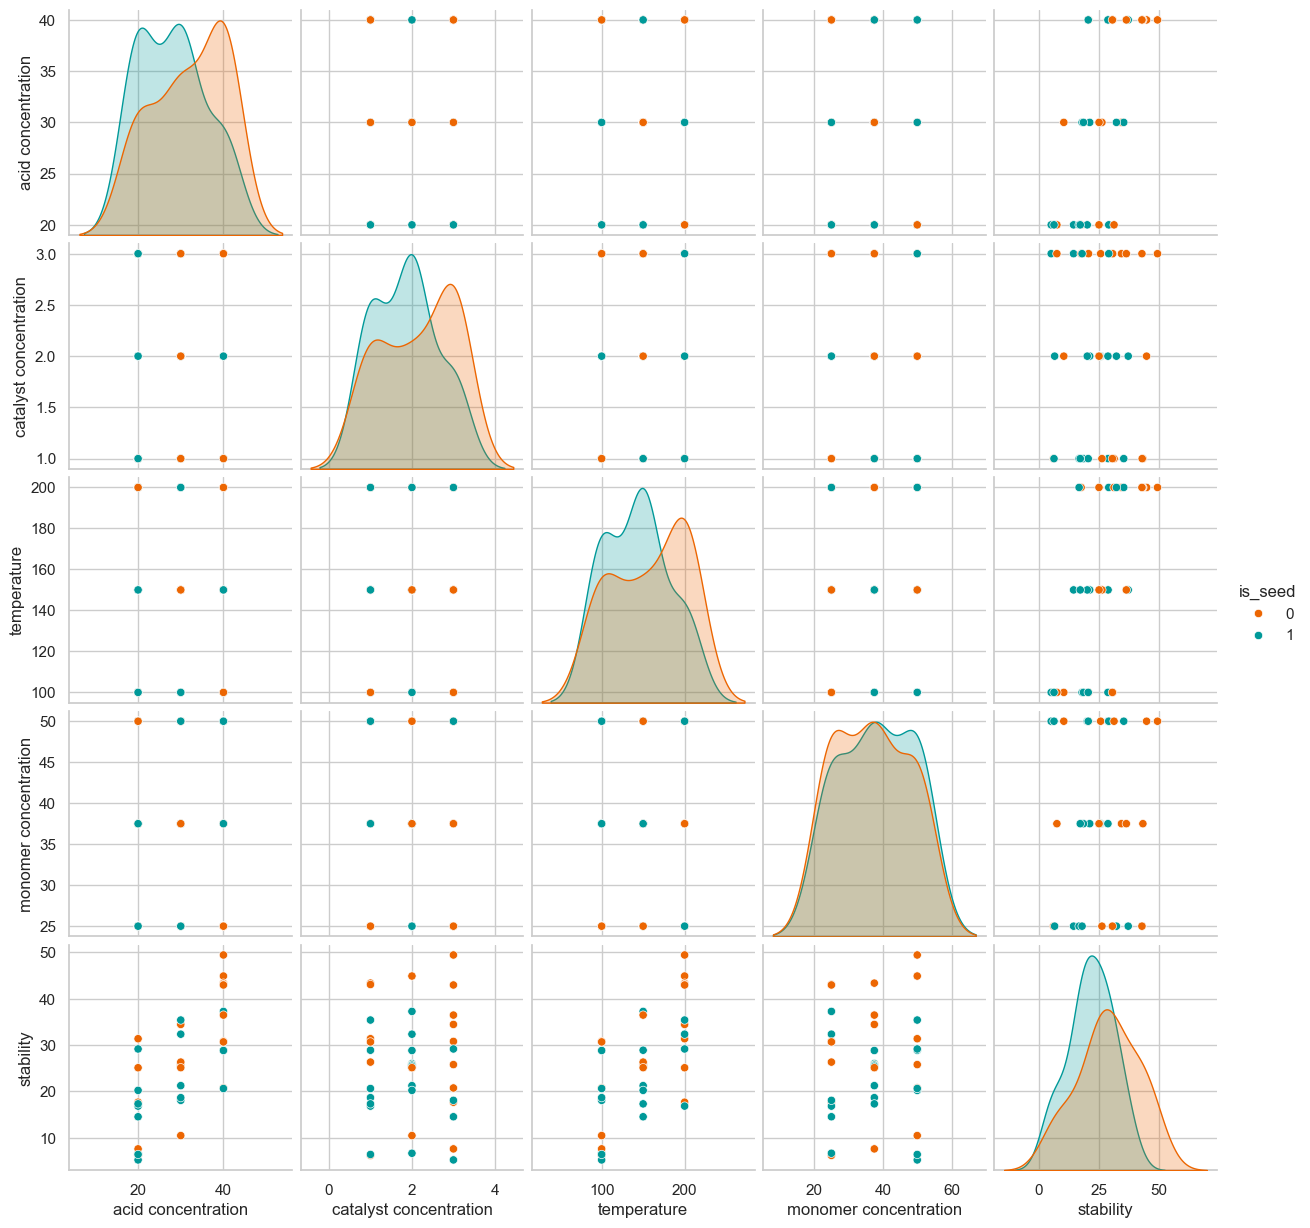

In [133]:
sns.pairplot(df, diag_kind='kde', hue='is_seed');

In [136]:
df.shape

(40, 6)

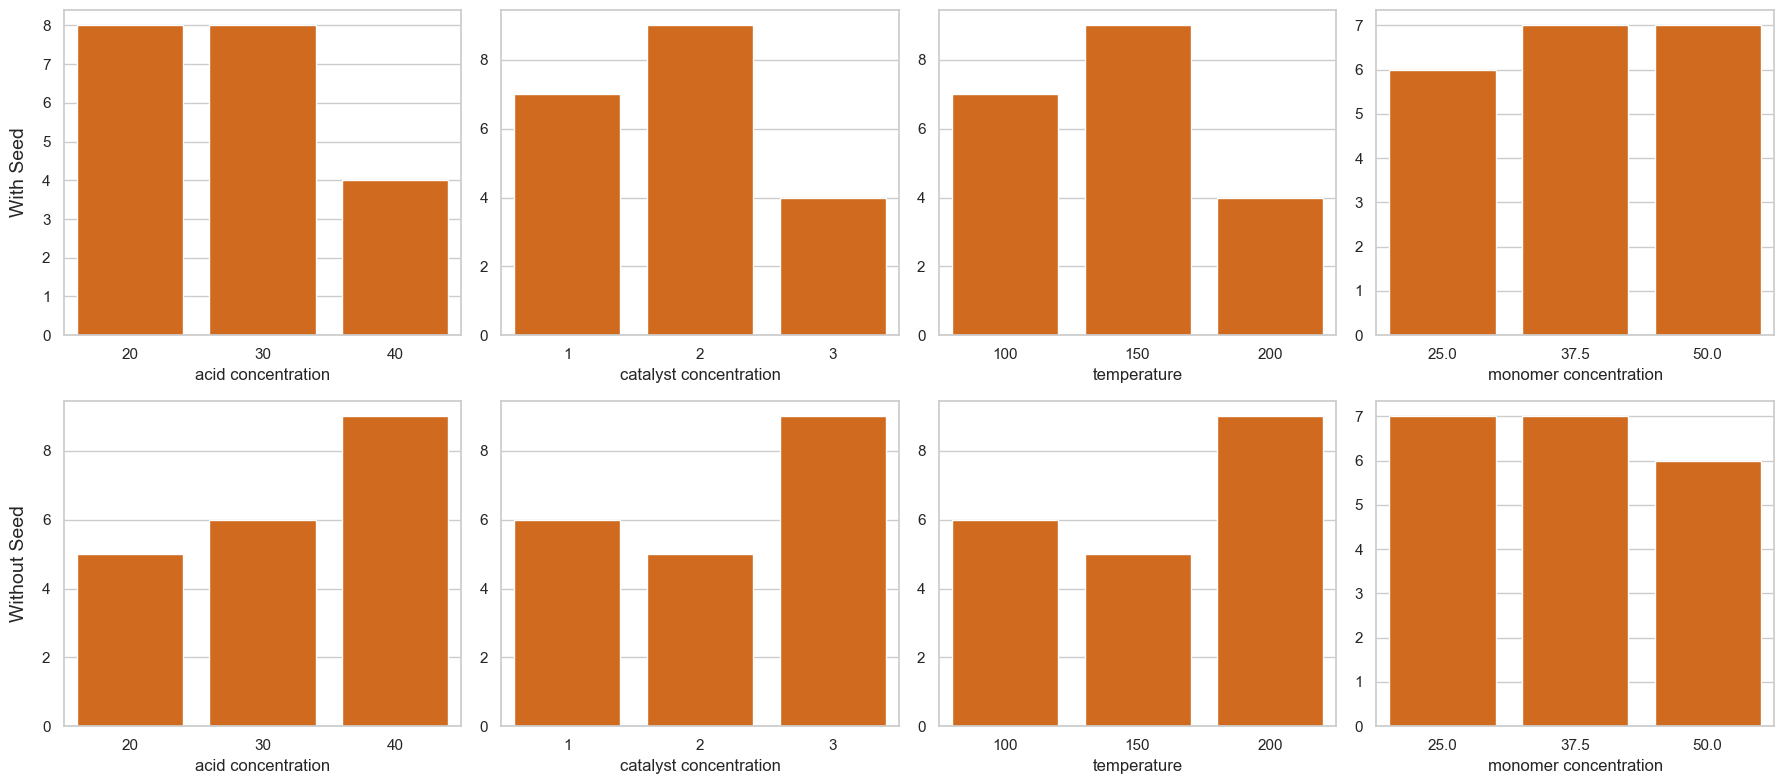

In [137]:
_, axes = plt.subplots(2, 4, figsize=(18, 8))
sns.countplot(x=df.loc[df['is_seed'] == 1, 'acid concentration'], ax=axes[0, 0]);
sns.countplot(x=df.loc[df['is_seed'] == 1, 'catalyst concentration'], ax=axes[0, 1]);
sns.countplot(x=df.loc[df['is_seed'] == 1, 'temperature'], ax=axes[0, 2]);
sns.countplot(x=df.loc[df['is_seed'] == 1, 'monomer concentration'], ax=axes[0, 3]);
sns.countplot(x=df.loc[df['is_seed'] == 0, 'acid concentration'], ax=axes[1, 0]);
sns.countplot(x=df.loc[df['is_seed'] == 0, 'catalyst concentration'], ax=axes[1, 1]);
sns.countplot(x=df.loc[df['is_seed'] == 0, 'temperature'], ax=axes[1, 2]);
sns.countplot(x=df.loc[df['is_seed'] == 0, 'monomer concentration'], ax=axes[1, 3]);

axes[0, 0].set_ylabel('With Seed', fontsize=14, labelpad=10)
axes[1, 0].set_ylabel('Without Seed', fontsize=14, labelpad=10)

for ax in axes[0, 1:]:
    ax.set_ylabel('')
for ax in axes[1, 1:]:
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

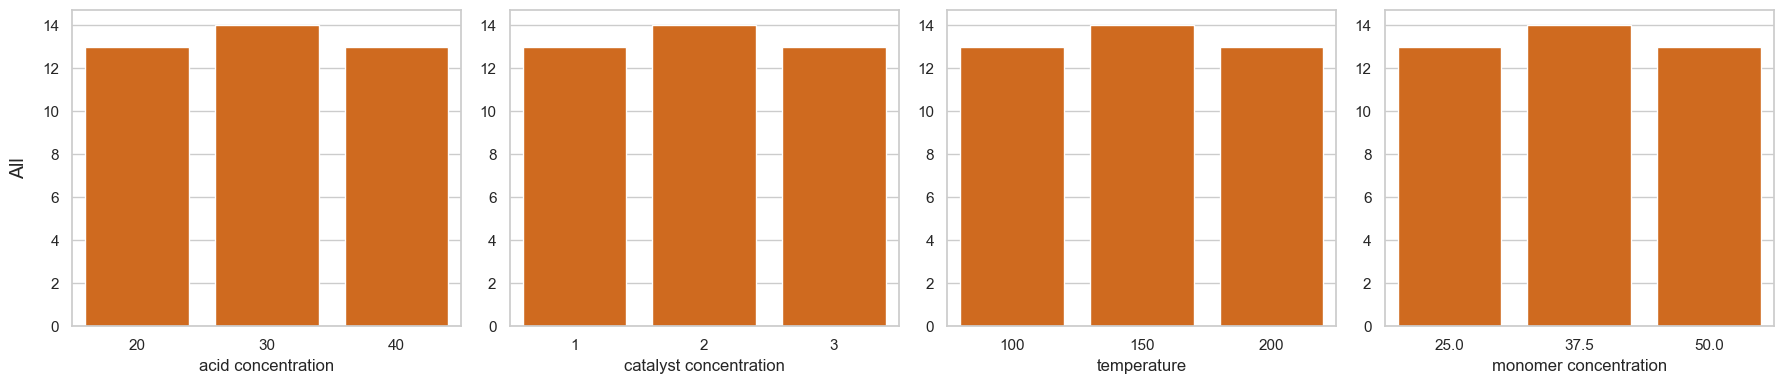

In [138]:
_, axes = plt.subplots(1, 4, figsize=(18, 4))
sns.countplot(x=df.loc[:, 'acid concentration'], ax=axes[0]);
sns.countplot(x=df.loc[:, 'catalyst concentration'], ax=axes[1]);
sns.countplot(x=df.loc[:, 'temperature'], ax=axes[2]);
sns.countplot(x=df.loc[:, 'monomer concentration'], ax=axes[3]);
axes[0].set_ylabel('All', fontsize=14, labelpad=10)
for ax in axes[1:]:
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

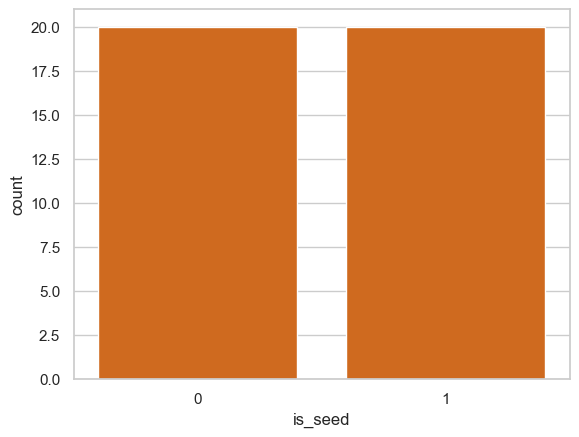

In [139]:
sns.countplot(x=df.is_seed);

Die Verteilung von `is_seed` deutet darauf hin, dass diese Variable im Rahmen des Experiments kontrolliert bzw. randomisiert wurde. Dies spricht für ein experimentelles Studiendesign, möglicherweise eine prospektive Studie. Im Gegensatz dazu basiert der Sauerstoff-Datensatz auf Beobachtungsdaten, wo die Variablen nicht kontrolliert wurden.

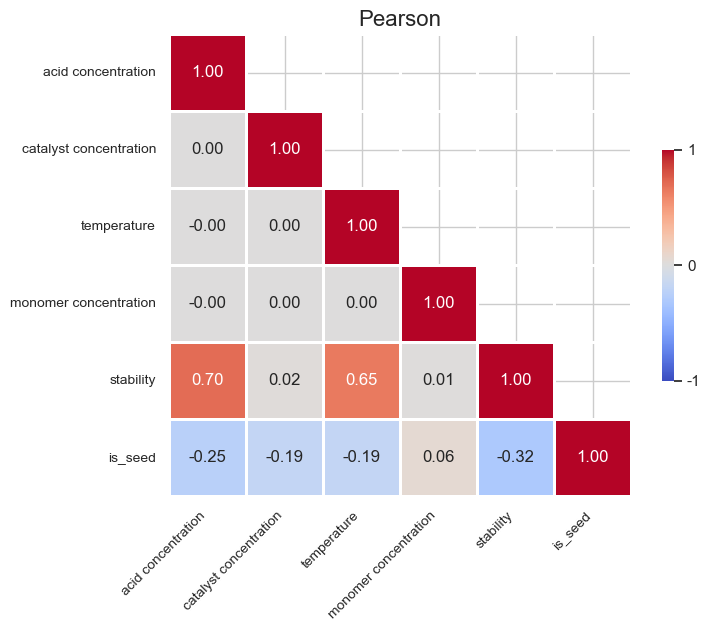

In [140]:
num_corr_heatmap(df.corr(numeric_only=True))

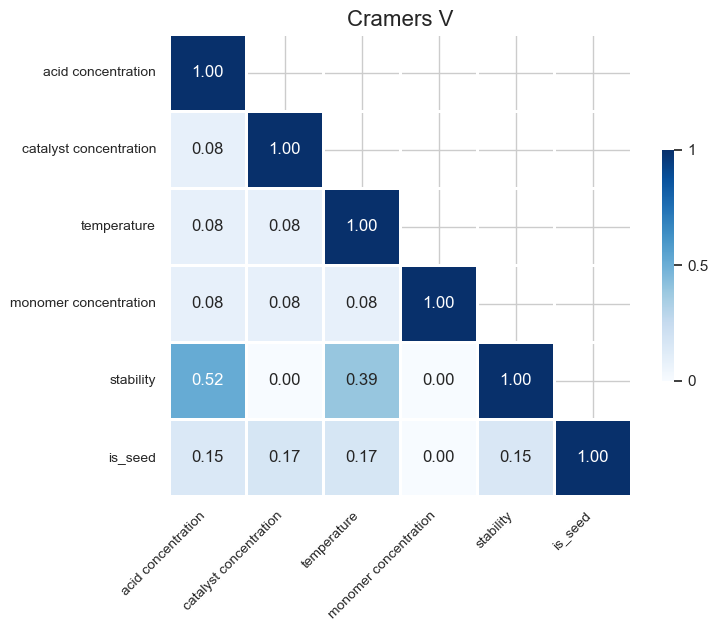

In [141]:
cramers_v = cramers_v_matrix(df)
cat_corr_heatmap(cramers_v)

> `acid concentration` und `temperature` haben einen guten Zusammenhang mit `stability` in den beiden Pearson und Cramer's V Matrizen.

### Base Modell

In [142]:
X = df[['acid concentration', 'temperature']]
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     186.5
Date:                Thu, 22 May 2025   Prob (F-statistic):           4.73e-20
Time:                        22:48:53   Log-Likelihood:                -105.44
No. Observations:                  40   AIC:                             216.9
Df Residuals:                      37   BIC:                             221.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -31.0549      2

> Nur mit 2 Prädiktoren haben wir gut genug R2 bekommen.

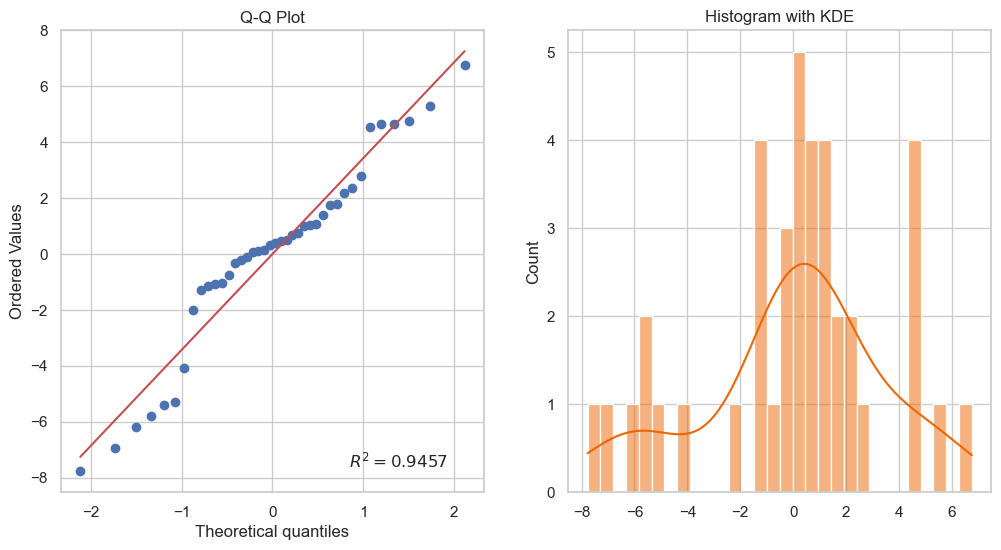

Shapiro-Wilk normality test: p-value = 0.046893519489415746
D'Agostino's K^2 normality test: p-value = 0.39709883921944883
Kolmogorov-Smirnov normality test: p-value = 0.28723235883394616
Anderson-Darling normality test: statistic = 0.9965659527756685, critical value = 0.726


In [143]:
check_normality(model.resid)

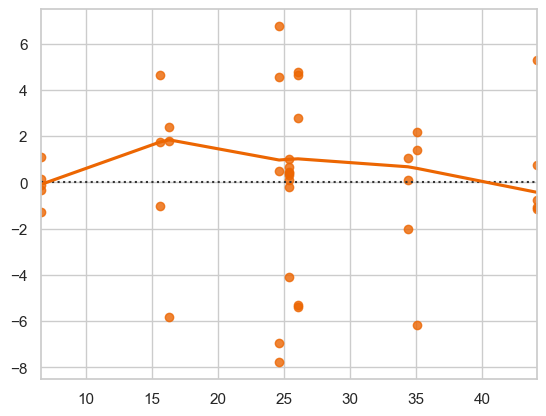

In [144]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True);

> Die Residuen sind normalverteilt und die Homoskedastizitätsannahme ist erfüllt.

### Komplexere Modelle

In [145]:
df.head()

,acid concentration,catalyst concentration,temperature,monomer concentration,stability,is_seed
0,30,2,150,37.5,21.25,1
1,20,2,200,37.5,25.11,0
2,20,3,150,25.0,14.54,1
3,20,3,200,25.0,17.68,0
4,20,2,150,50.0,20.23,1


In [ ]:
df['acid_catalyst'] = df['acid concentration'] * df['catalyst concentration']
df['acid_temperature'] = df['acid concentration'] * df['temperature']
df['acid_monomer'] = df['acid concentration'] * df['monomer concentration']
df['catalyst_temperature'] = df['catalyst concentration'] * df['temperature']
df['catalyst_monomer'] = df['catalyst concentration'] * df['monomer concentration']
df['temperature_monomer'] = df['temperature'] * df['monomer concentration']
df['acid_seed'] = df['acid concentration'] * df['is_seed']
df['catalyst_seed'] = df['catalyst concentration'] * df['is_seed']
df['temperature_seed'] = df['temperature'] * df['is_seed']
df['monomer_seed'] = df['monomer concentration'] * df['is_seed']
df.head()

,acid concentration,catalyst concentration,temperature,monomer concentration,stability,is_seed,acid_catalyst,acid_temperature,acid_monomer,catalyst_temperature,catalyst_monomer,temperature_monomer,acid_seed,catalyst_seed,temperature_seed,monomer_seed
0,30,2,150,37.5,21.25,1,60,4500,1125.0,300,75.0,5625.0,30,2,150,37.5
1,20,2,200,37.5,25.11,0,40,4000,750.0,400,75.0,7500.0,0,0,0,0.0
2,20,3,150,25.0,14.54,1,60,3000,500.0,450,75.0,3750.0,20,3,150,25.0
3,20,3,200,25.0,17.68,0,60,4000,500.0,600,75.0,5000.0,0,0,0,0.0
4,20,2,150,50.0,20.23,1,40,3000,1000.0,300,100.0,7500.0,20,2,150,50.0


In [147]:
X = df.drop(columns=['stability'])
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     104.4
Date:                Thu, 22 May 2025   Prob (F-statistic):           3.96e-18
Time:                        22:48:53   Log-Likelihood:                -69.677
No. Observations:                  40   AIC:                             171.4
Df Residuals:                      24   BIC:                             198.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -22

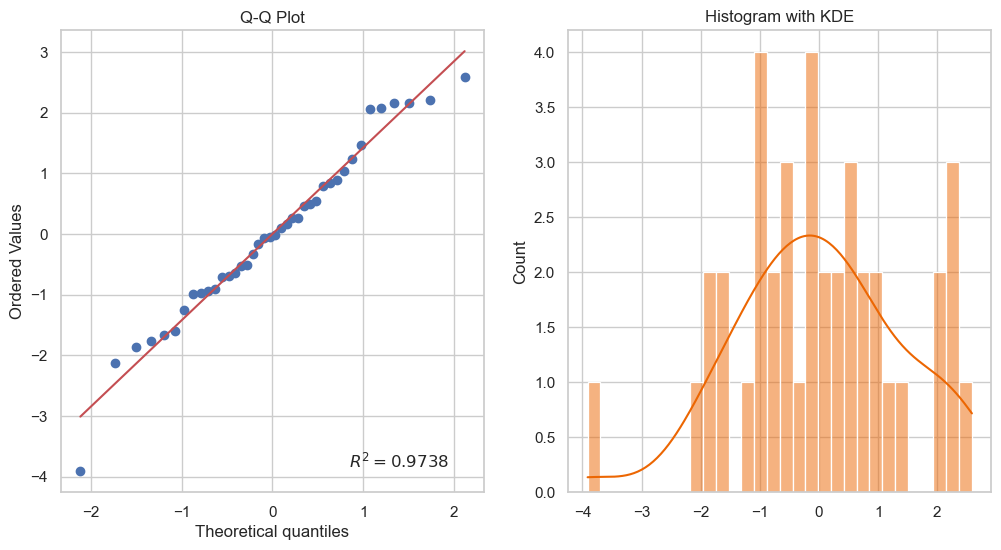

Shapiro-Wilk normality test: p-value = 0.5157139486549424
D'Agostino's K^2 normality test: p-value = 0.6616067960934395
Kolmogorov-Smirnov normality test: p-value = 0.9437531601170217
Anderson-Darling normality test: statistic = 0.25178634136783273, critical value = 0.726


In [148]:
check_normality(model.resid)

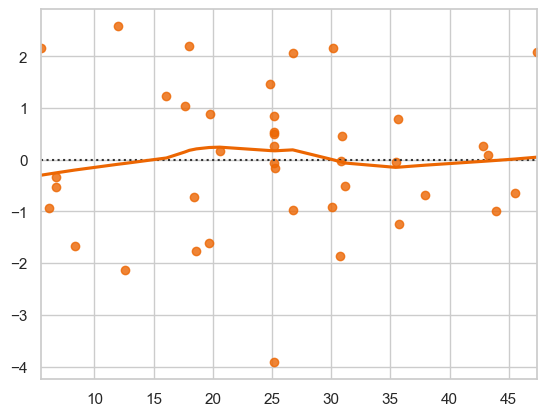

In [149]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True);

In [150]:
X = df.drop(columns=['stability', 'acid_seed'])
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     116.5
Date:                Thu, 22 May 2025   Prob (F-statistic):           3.58e-19
Time:                        22:48:54   Log-Likelihood:                -69.684
No. Observations:                  40   AIC:                             169.4
Df Residuals:                      25   BIC:                             194.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -22

In [151]:
X = df.drop(columns=['stability', 'acid_seed', 'acid_temperature'])
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     130.3
Date:                Thu, 22 May 2025   Prob (F-statistic):           3.09e-20
Time:                        22:48:54   Log-Likelihood:                -69.708
No. Observations:                  40   AIC:                             167.4
Df Residuals:                      26   BIC:                             191.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -21

In [152]:
X = df.drop(columns=['stability', 'acid_seed', 'acid_temperature', 'catalyst_seed'])
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     144.5
Date:                Thu, 22 May 2025   Prob (F-statistic):           2.98e-21
Time:                        22:48:54   Log-Likelihood:                -69.986
No. Observations:                  40   AIC:                             166.0
Df Residuals:                      27   BIC:                             187.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -20

In [153]:
X = df.drop(columns=['stability', 'acid_seed', 'acid_temperature', 'catalyst_seed', 'monomer_seed'])
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     158.7
Date:                Thu, 22 May 2025   Prob (F-statistic):           3.38e-22
Time:                        22:48:54   Log-Likelihood:                -70.565
No. Observations:                  40   AIC:                             165.1
Df Residuals:                      28   BIC:                             185.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -18

In [154]:
X = df.drop(columns=['stability', 'acid_seed', 'acid_temperature', 'catalyst_seed', 'monomer_seed', 'catalyst_temperature'])
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     177.2
Date:                Thu, 22 May 2025   Prob (F-statistic):           3.24e-23
Time:                        22:48:54   Log-Likelihood:                -70.963
No. Observations:                  40   AIC:                             163.9
Df Residuals:                      29   BIC:                             182.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -19

In [155]:
X = df.drop(columns=['stability', 'acid_seed', 'acid_temperature', 'catalyst_seed', 'monomer_seed', 'catalyst_temperature', 'catalyst_monomer'])
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     188.8
Date:                Thu, 22 May 2025   Prob (F-statistic):           6.70e-24
Time:                        22:48:54   Log-Likelihood:                -72.461
No. Observations:                  40   AIC:                             164.9
Df Residuals:                      30   BIC:                             181.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -22

In [156]:
X = df.drop(columns=['stability', 'acid_seed', 'acid_temperature', 'catalyst_seed', 'monomer_seed', 'catalyst_temperature', 'acid_catalyst'])
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     185.2
Date:                Thu, 22 May 2025   Prob (F-statistic):           8.89e-24
Time:                        22:48:54   Log-Likelihood:                -72.839
No. Observations:                  40   AIC:                             165.7
Df Residuals:                      30   BIC:                             182.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -22

### Bestes Komplexes Modell

In [ ]:
X = df[['acid concentration', 
        'catalyst concentration', 
        'temperature', 
        'monomer concentration', 
        'is_seed', 
        'acid_catalyst', 
        'acid_monomer', 
        'catalyst_monomer', 
        'temperature_monomer', 
        'temperature_seed']]
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     177.2
Date:                Thu, 22 May 2025   Prob (F-statistic):           3.24e-23
Time:                        22:48:54   Log-Likelihood:                -70.963
No. Observations:                  40   AIC:                             163.9
Df Residuals:                      29   BIC:                             182.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -19

### Fazit

Base Modell -> Bestes Modell
- f: 2 -> 5
- p: 3 -> 11
- R2: 0.910 -> 0.984 (+0.07)
- R2-Adj: 0.905 -> 0.978 (+0.07)
- AIC: 216.9 -> 163.9 (-53)
- BIC: 221.9 -> 182.5 (-39.4)

Also das Modell hat sich verbessert.

### F-Test

In [ ]:
sse_base = OLS(df['stability'], add_constant(df[['acid concentration', 'temperature']])).fit().ssr
sse_full = OLS(y, X).fit().ssr
print(f'SSE base: {sse_base:.2f}')
print(f'SSE full: {sse_full:.2f}')

delta_sse = sse_base - sse_full
delta_p = 8
delta_mse = delta_sse / delta_p
mse = sse_full / (len(X) - 11)
f_stat = delta_mse / mse
alpha = 0.05
f_krit = f.isf(0.05, delta_p, len(X) - 11)
p_value = f.sf(f_stat, delta_p, len(X) - 11)

print(f'alpha: {alpha:.2f}')
print(f'F-Wert: {f_stat:.2f}')
print(f'F-Krit: {f_krit:.2f}')
print(f'p-Wert: {p_value:.8f}')

SSE base: 456.15
SSE full: 81.38
alpha: 0.05
F-Wert: 16.69
F-Krit: 2.28
p-Wert: 0.00000001


Da f_Wert = $16.69$ > f_krit = $2.27$ bzw. P-Wert = $0$ => Kompliziertes Modell ist signifikant besser!

c) Welchen maximalen Wert für Stabilität sagt Ihr Modell voraus? Welche Faktorstufen werden dafür verwendet?

In [174]:
df['predicted'] = model.fittedvalues
df['residuals'] = model.resid
df.head()

,acid concentration,catalyst concentration,temperature,monomer concentration,stability,is_seed,acid_catalyst,acid_temperature,acid_monomer,catalyst_temperature,catalyst_monomer,temperature_monomer,acid_seed,catalyst_seed,temperature_seed,monomer_seed,predicted,residuals
0,30,2,150,37.5,21.25,1,60,4500,1125.0,300,75.0,5625.0,30,2,150,37.5,25.259685,-4.009685
1,20,2,200,37.5,25.11,0,40,4000,750.0,400,75.0,7500.0,0,0,0,0.0,25.192330,-0.082330
2,20,3,150,25.0,14.54,1,60,3000,500.0,450,75.0,3750.0,20,3,150,25.0,11.952905,2.587095
3,20,3,200,25.0,17.68,0,60,4000,500.0,600,75.0,5000.0,0,0,0,0.0,18.255418,-0.575418
4,20,2,150,50.0,20.23,1,40,3000,1000.0,300,100.0,7500.0,20,2,150,50.0,18.214871,2.015129


In [177]:
df.loc[df.predicted == df.predicted.max(), ['acid concentration', 
                                            'catalyst concentration', 
                                            'temperature', 
                                            'monomer concentration', 
                                            'is_seed']]

,acid concentration,catalyst concentration,temperature,monomer concentration,is_seed
19,40,3,200,50.0,0


d) Nehmen wir an, ein stetiger Faktor (z.B. die Temperatur) würde sich als irrelevant heraustellen. Mit welcher Temperatur führen Sie dann nachfolgende Experimente durch? Begründen Sie Ihre Antwort.

Wenn es irrelevant ist, heißt es, es hat keine Korrelation mit der Zielvariable, deswegen ist es egal mit welcher Temperatur wir das Experiment durchführen.

### Fragen:

1- Darf man F-Test zwischen 2 beliebige Modelle machen, wenn ein in dem anderen enthalten ist, um das Signifikanz für das komplizierte Modell zu überprüfen oder sollte man nur diesen Test benutzen, um das Signifikanz von Interaktionsterme zu überprüfen?

2- Obwohl die Prädiktoren stetig sind, haben sie immer noch nur 3 Ausprägungen. Kann man in so einem Fall die Prädiktoren einfach als Ordinale Variable annehmen und mit 0, 1, 2 kodieren? Ist das Endergebnis immer das Gleiche wie hier? (bis zum Endmodell, natürlich die Koeffizienten werden anders sein).

## Bonus

### Alternatives Modell

In [197]:
df = pd.read_csv('../data/Stability.txt')
df.head()

,acid concentration,catalyst concentration,temperature,monomer concentration,Seed,stability
0,30,2,150,37.5,Yes,21.25
1,20,2,200,37.5,No,25.11
2,20,3,150,25.0,Yes,14.54
3,20,3,200,25.0,No,17.68
4,20,2,150,50.0,Yes,20.23


In [198]:
df['acid concentration'] = df['acid concentration'].map({20: 0, 30: 1, 40: 2})
df['catalyst concentration'] = df['catalyst concentration'].map({1: 0, 2: 1, 3: 2})
df['temperature'] = df['temperature'].map({100: 0, 150: 1, 200: 2})
df['monomer concentration'] = df['monomer concentration'].map({25: 0, 37.5: 1, 50: 2})
df['is_seed'] = (df['Seed'] == 'Yes').astype(int)
df = df.drop(columns=['Seed'])
df.head()

,acid concentration,catalyst concentration,temperature,monomer concentration,stability,is_seed
0,1,1,1,1,21.25,1
1,0,1,2,1,25.11,0
2,0,2,1,0,14.54,1
3,0,2,2,0,17.68,0
4,0,1,1,2,20.23,1


In [199]:
df['acid_catalyst'] = df['acid concentration'] * df['catalyst concentration']
df['acid_temperature'] = df['acid concentration'] * df['temperature']
df['acid_monomer'] = df['acid concentration'] * df['monomer concentration']
df['catalyst_temperature'] = df['catalyst concentration'] * df['temperature']
df['catalyst_monomer'] = df['catalyst concentration'] * df['monomer concentration']
df['temperature_monomer'] = df['temperature'] * df['monomer concentration']
df['acid_seed'] = df['acid concentration'] * df['is_seed']
df['catalyst_seed'] = df['catalyst concentration'] * df['is_seed']
df['temperature_seed'] = df['temperature'] * df['is_seed']
df['monomer_seed'] = df['monomer concentration'] * df['is_seed']
df.head()

,acid concentration,catalyst concentration,temperature,monomer concentration,stability,is_seed,acid_catalyst,acid_temperature,acid_monomer,catalyst_temperature,catalyst_monomer,temperature_monomer,acid_seed,catalyst_seed,temperature_seed,monomer_seed
0,1,1,1,1,21.25,1,1,1,1,1,1,1,1,1,1,1
1,0,1,2,1,25.11,0,0,0,0,2,1,2,0,0,0,0
2,0,2,1,0,14.54,1,0,0,0,2,0,0,0,2,1,0
3,0,2,2,0,17.68,0,0,0,0,4,0,0,0,0,0,0
4,0,1,1,2,20.23,1,0,0,0,1,2,2,0,1,1,2


In [201]:
X = df[['acid concentration', 
        'catalyst concentration', 
        'temperature', 
        'monomer concentration', 
        'is_seed', 
        'acid_catalyst', 
        'acid_monomer', 
        'catalyst_monomer', 
        'temperature_monomer', 
        'temperature_seed']]
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     177.2
Date:                Fri, 23 May 2025   Prob (F-statistic):           3.24e-23
Time:                        00:03:20   Log-Likelihood:                -70.963
No. Observations:                  40   AIC:                             163.9
Df Residuals:                      29   BIC:                             182.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7

**Gedankte**: So macht es viel mehr Sinn, die Koeffizienten sind besser interpretierbar und das Signifikanz ist anscheinend besser geworden mit genau den gleichen R2, R2 Adjusted, AIC und BIC.

z.B.
- `temperature` ist jetzt signifikant aber früher hatte es den P-Wert von 0.828.
- Die Koeffizienten können jetzt direkt auf Stufenniveau interpretiert werden und nicht als eine Einheit, was in diesem Fall nicht so viel Sinn macht. 
- Z.B. jetzt kann man sagen, die `Stabilität` steigt um 6,4 wenn ein Niveau (Klasse) von `Temperatur` steigt, im Vergleich zu früher, wenn ich sagen musste, die `Stabilität` sinkt um 0.0052 wenn `Temperatur` eine Einheit steigt (wir haben keine Einheitliche Daten in unserem Datensatz)
- Z.B. `Stabilität` steigt um 11.6 wenn die `acid concentration` um 1 Niveau steigt, früher `Stabilität` steigt um 1.6 wenn die `acid concentration` um 1 Einheit steigt.